# Dataset de competição

## Fase 0: Imports e Leitura dos Dados

In [145]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re # Used in Data Processing
from sklearn import preprocessing

# Definir o número máximo de colunas do pandas para 21
pd.set_option('display.max_columns', 21)

The following configuration was implemented to avoid pandas from considering that the 'None' value in the column 'Injeçao na rede (kWh)' is NaN.

In [146]:
allowed_nans = ['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN',
                '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA',
                'NULL', 'NaN', 'n/a', 'nan', 'null']

treino = pd.read_csv('datasets/treino.csv', na_values=allowed_nans, keep_default_na=False)

## Fase 1: Exploração Simples dos Dados

In [147]:
treino.shape

(11688, 21)

In [148]:
treino.columns

Index(['Data', 'Hora', 'Normal (kWh)', 'Horario Economico (kWh)',
       'Autoconsumo (kWh)', 'Injeçao na rede (kWh)', 'dt', 'dt_iso',
       'city_name', 'temp', 'feels_like', 'temp_min', 'temp_max', 'pressure',
       'sea_level', 'grnd_level', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description'],
      dtype='object')

In [149]:
treino.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injeçao na rede (kWh),dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,NaN,NaN,NaN,NaN,NaN,NaN,1630454400,2021-09-01 00:00:00 +0000 UTC,local,18.74,18.84,15.72,20.34,1015,NaN,NaN,83,1.18,NaN,78,broken clouds
1,NaN,NaN,NaN,NaN,NaN,NaN,1630458000,2021-09-01 01:00:00 +0000 UTC,local,18.73,18.83,15.72,20.34,1014,NaN,NaN,83,1.46,NaN,92,overcast clouds
2,NaN,NaN,NaN,NaN,NaN,NaN,1630461600,2021-09-01 02:00:00 +0000 UTC,local,17.84,17.98,16.72,20.34,1014,NaN,NaN,88,1.05,NaN,91,overcast clouds
3,NaN,NaN,NaN,NaN,NaN,NaN,1630465200,2021-09-01 03:00:00 +0000 UTC,local,18.27,18.40,16.68,20.34,1014,NaN,NaN,86,0.46,0.14,94,light rain
4,NaN,NaN,NaN,NaN,NaN,NaN,1630468800,2021-09-01 04:00:00 +0000 UTC,local,17.81,17.97,16.12,20.34,1013,NaN,NaN,89,0.93,1.26,95,moderate rain


In [150]:
treino.describe()

,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all
count,11016.000000,11016.000000,11016.000000,11016.000000,1.168800e+04,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,0.0,0.0,11688.000000,11688.000000,2435.000000,11688.000000
mean,11.500000,0.202278,0.159714,0.117314,1.651491e+09,16.406638,16.076164,14.433353,17.502990,1018.304073,NaN,NaN,76.619011,2.647688,0.884760,54.258214
std,6.922501,0.349478,0.271792,0.176762,1.214705e+07,5.715977,6.217605,4.960590,6.112344,6.109727,NaN,NaN,16.157421,1.458574,1.073453,40.443374
min,0.000000,0.000000,0.000000,0.000000,1.630454e+09,0.320000,-2.190000,-0.640000,1.330000,994.000000,NaN,NaN,19.000000,0.060000,0.100000,0.000000
25%,5.750000,0.000000,0.000000,0.000000,1.640973e+09,12.350000,11.760000,10.900000,12.930000,1015.000000,NaN,NaN,66.000000,1.610000,0.210000,7.000000
50%,11.500000,0.000000,0.000000,0.000000,1.651491e+09,15.760000,15.675000,14.540000,16.720000,1018.000000,NaN,NaN,81.000000,2.380000,0.450000,60.000000
75%,17.250000,0.314000,0.288000,0.227000,1.662009e+09,19.540000,19.560000,17.720000,20.700000,1022.000000,NaN,NaN,91.000000,3.400000,1.070000,98.000000
max,23.000000,3.251000,6.978000,1.192000,1.672528e+09,40.850000,41.330000,36.720000,41.450000,1034.000000,NaN,NaN,100.000000,11.100000,7.450000,100.000000


In [151]:
treino.duplicated().any()

False

In [152]:
treino.isna().any()

Data                        True
Hora                        True
Normal (kWh)                True
Horario Economico (kWh)     True
Autoconsumo (kWh)           True
Injeçao na rede (kWh)       True
dt                         False
dt_iso                     False
city_name                  False
temp                       False
feels_like                 False
temp_min                   False
temp_max                   False
pressure                   False
sea_level                   True
grnd_level                  True
humidity                   False
wind_speed                 False
rain_1h                     True
clouds_all                 False
weather_description        False
dtype: bool

In [153]:
treino.dtypes

Data                        object
Hora                       float64
Normal (kWh)               float64
Horario Economico (kWh)    float64
Autoconsumo (kWh)          float64
Injeçao na rede (kWh)       object
dt                           int64
dt_iso                      object
city_name                   object
temp                       float64
feels_like                 float64
temp_min                   float64
temp_max                   float64
pressure                     int64
sea_level                  float64
grnd_level                 float64
humidity                     int64
wind_speed                 float64
rain_1h                    float64
clouds_all                   int64
weather_description         object
dtype: object

In [154]:
contagem_relativa = treino['city_name'].value_counts(normalize=True)
contagem_absoluta = (contagem_relativa * len(treino)).round().astype(int)
print(contagem_absoluta)

city_name
local    11688
Name: proportion, dtype: int64


In [155]:
treino['city_name'].nunique()

1

'city_name' is a useless column because it only has 1 value. 

In [156]:
treino['dt_iso'].isna().sum()

0

'dt_iso' has 0 missing values so it can replace the columns 'Data' and 'Hora' that have some missing values.

In [157]:
treino['sea_level'].isna().sum()

11688

For all the entries in the dataset, the feature 'sea_level' has a missing value. For this reason this feature is useless and must be removed.

In [158]:
treino['grnd_level'].isna().sum()

11688

For all the entries in the dataset, the feature 'grnd_level' has a missing value. For this reason this feature is useless and must be removed.

## Fase 2: Tratamento dos Dados

The column 'city_name' only has 1 possible value so it is useless and must the removed from the dataset. 

In [159]:
treino.drop('city_name', inplace=True, axis=1)

Like it was stated before, the features 'sea_level' and 'grnd_level' have 100% missing value presence and so must be removed.

In [160]:
treino.drop('sea_level', inplace=True, axis=1)
treino.drop('grnd_level', inplace=True, axis=1)

The column 'dt_iso' will replace the columns 'Data' and 'Hora'. The 'dt_iso' column is going to also be split into two new columns: 'Date' and 'Hour'.

In [161]:
def toDate(d):
    return re.search(r'\d+\-\d+\-\d+', d).group()

def toHour(h):
    return re.search(r'\d+\:\d+\:\d+', h).group()

treino.drop('Data', inplace=True, axis=1)
treino.drop('Hora', inplace=True, axis=1)
hour = treino['dt_iso']
treino.insert(0, 'Hour', hour)
treino.rename(columns = {'dt_iso':'Date'}, inplace = True)

dates = treino['Date'].apply(toDate)
treino['Date'] = dates
hours = treino['Hour'].apply(toHour)
treino['Hour'] = hours

dates = treino.pop('Date') 
treino.insert(0, 'Date', dates) 
dts = treino.pop('dt') 
treino.insert(0, 'dt', dts)
treino 

,dt,Date,Hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injeçao na rede (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01,00:00:00,NaN,NaN,NaN,NaN,18.74,18.84,15.72,20.34,1015,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01,01:00:00,NaN,NaN,NaN,NaN,18.73,18.83,15.72,20.34,1014,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01,02:00:00,NaN,NaN,NaN,NaN,17.84,17.98,16.72,20.34,1014,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01,03:00:00,NaN,NaN,NaN,NaN,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01,04:00:00,NaN,NaN,NaN,NaN,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11683,1672513200,2022-12-31,19:00:00,1.693,0.000,0.0,None,15.70,15.57,15.57,15.72,1018,86,5.56,3.58,100,moderate rain
11684,1672516800,2022-12-31,20:00:00,1.327,0.000,0.0,None,15.55,15.43,12.72,15.70,1018,87,4.47,4.20,100,heavy intensity rain
11685,1672520400,2022-12-31,21:00:00,0.757,0.000,0.0,None,13.45,13.28,12.23,13.99,1019,93,3.29,4.23,100,heavy intensity rain
11686,1672524000,2022-12-31,22:00:00,0.000,0.675,0.0,None,12.93,12.73,12.23,13.43,1019,94,1.49,3.90,100,moderate rain


Another 2 columns that we can create are the column 'Month', representing the current month of the instance, and the column 'Season', representing the current season of the instance.

In [162]:
months = treino['Date']
seasons = treino['Date']

treino.insert(3, 'Month', months)
treino.insert(4, 'Season', seasons)

monthsL = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

def toMonth(m):
    return monthsL[int(re.search(r'\-(\d+)\-', m).group(1))-1]

def toSeason(s):
    m = int(re.search(r'\-(\d+)\-', s).group(1))
    if m >= 3 and m <= 5:
        return 'Spring'
    if m >= 6 and m <= 8:
        return 'Summer'
    if m >= 9 and m <= 11:
        return 'Autumn'
    if (m >= 1 and m <= 2) or m == 12:
        return 'Winter'

months = treino['Month'].apply(toMonth)
treino['Month'] = months
seasons = treino['Season'].apply(toSeason)
treino['Season'] = seasons
treino

,dt,Date,Hour,Month,Season,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injeçao na rede (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01,00:00:00,September,Autumn,NaN,NaN,NaN,NaN,18.74,18.84,15.72,20.34,1015,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01,01:00:00,September,Autumn,NaN,NaN,NaN,NaN,18.73,18.83,15.72,20.34,1014,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01,02:00:00,September,Autumn,NaN,NaN,NaN,NaN,17.84,17.98,16.72,20.34,1014,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01,03:00:00,September,Autumn,NaN,NaN,NaN,NaN,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01,04:00:00,September,Autumn,NaN,NaN,NaN,NaN,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11683,1672513200,2022-12-31,19:00:00,December,Winter,1.693,0.000,0.0,None,15.70,15.57,15.57,15.72,1018,86,5.56,3.58,100,moderate rain
11684,1672516800,2022-12-31,20:00:00,December,Winter,1.327,0.000,0.0,None,15.55,15.43,12.72,15.70,1018,87,4.47,4.20,100,heavy intensity rain
11685,1672520400,2022-12-31,21:00:00,December,Winter,0.757,0.000,0.0,None,13.45,13.28,12.23,13.99,1019,93,3.29,4.23,100,heavy intensity rain
11686,1672524000,2022-12-31,22:00:00,December,Winter,0.000,0.675,0.0,None,12.93,12.73,12.23,13.43,1019,94,1.49,3.90,100,moderate rain


## Fase 3: Exploração Detalhada

### Relation: 'Month' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


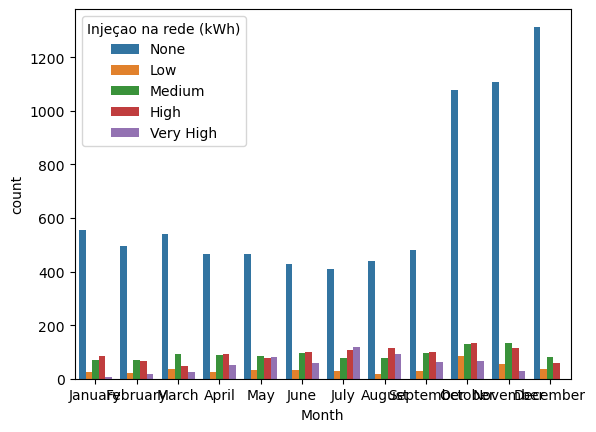

In [163]:
sns.countplot(x='Month', order=monthsL, hue='Injeçao na rede (kWh)', data=treino)
plt.show()

### Relation: 'Season' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

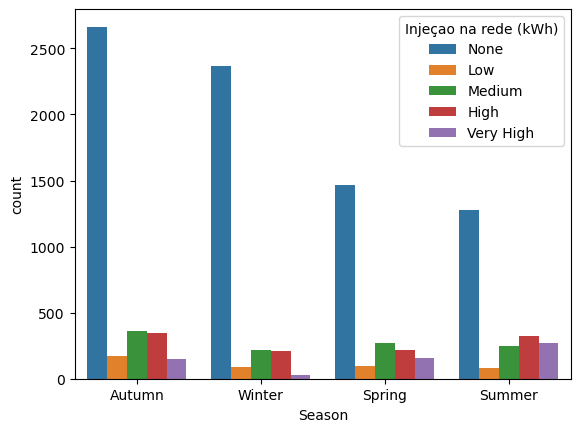

In [164]:
sns.countplot(x='Season', hue='Injeçao na rede (kWh)', data=treino)
plt.show()

### Relation: 'temp' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


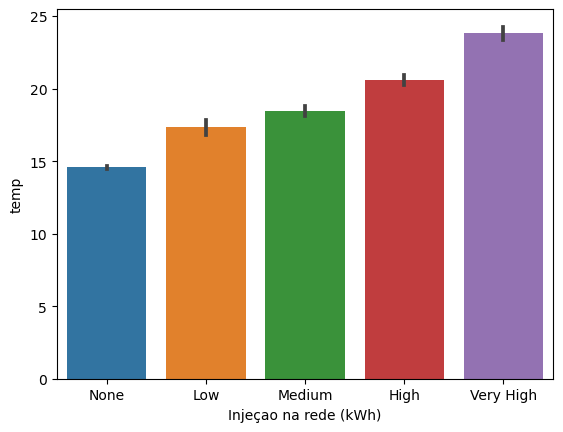

In [165]:
sns.barplot(x='Injeçao na rede (kWh)', y='temp', data=treino)
plt.show()

### Relation: 'feels_like' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


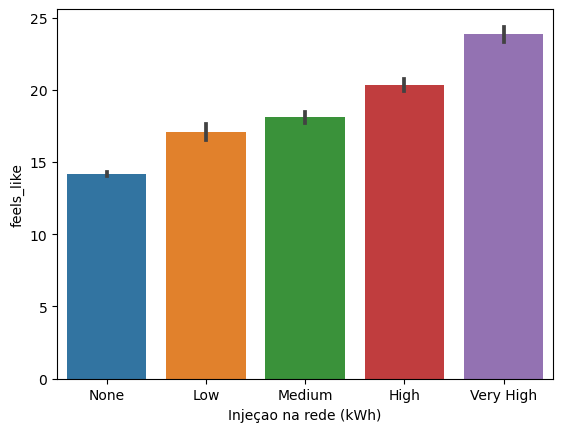

In [166]:
sns.barplot(x='Injeçao na rede (kWh)', y='feels_like', data=treino)
plt.show()

### Relation: 'temp_min' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


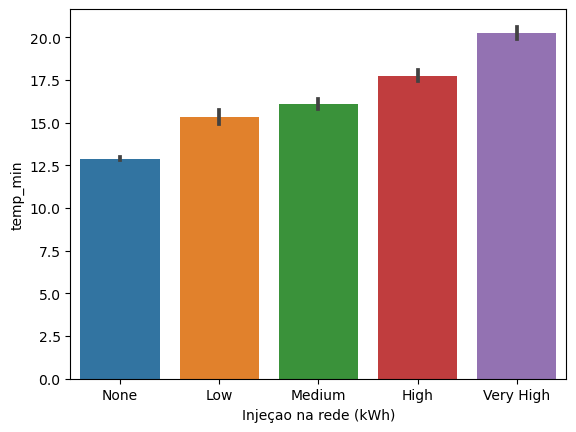

In [167]:
sns.barplot(x='Injeçao na rede (kWh)', y='temp_min', data=treino)
plt.show()

### Relation: 'temp_max' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


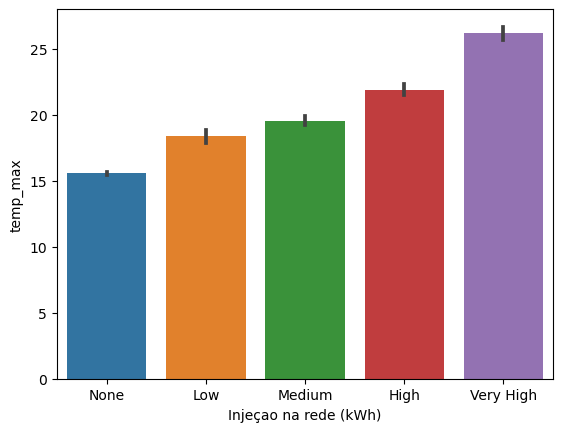

In [168]:
sns.barplot(x='Injeçao na rede (kWh)', y='temp_max', data=treino)
plt.show()

### Relation: 'pressure' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


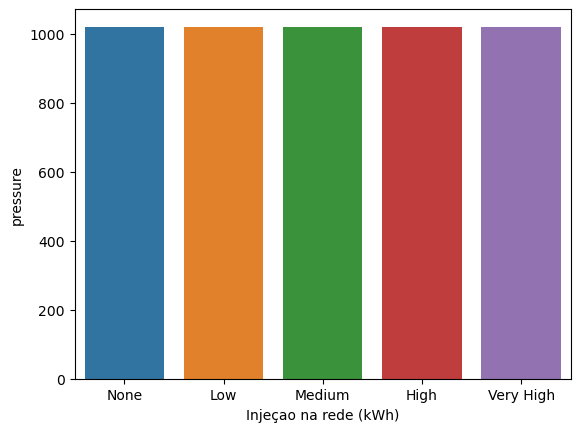

In [169]:
sns.barplot(x='Injeçao na rede (kWh)', y='pressure', data=treino)
plt.show()

### Relation: 'humidity' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


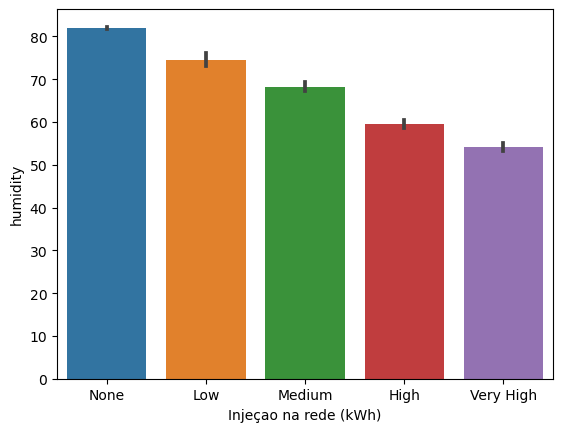

In [171]:
sns.barplot(x='Injeçao na rede (kWh)', y='humidity', data=treino)
plt.show()

### Relation: 'wind_speed' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


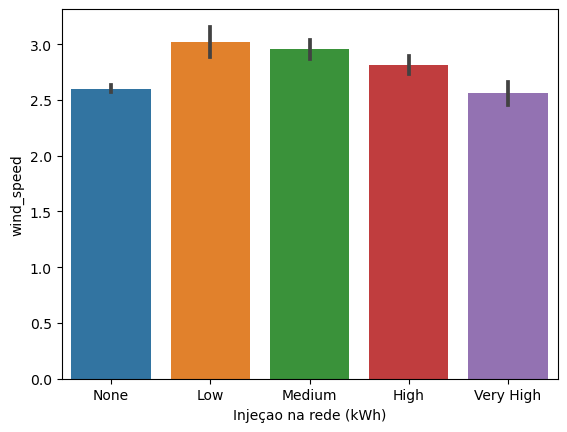

In [172]:
sns.barplot(x='Injeçao na rede (kWh)', y='wind_speed', data=treino)
plt.show()

### Relation: 'rain_1h' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


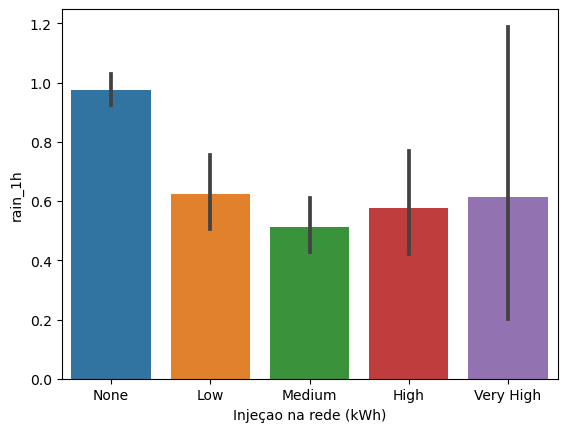

In [173]:
sns.barplot(x='Injeçao na rede (kWh)', y='rain_1h', data=treino)
plt.show()

We can check that the feature 'rain_1h', when the feature 'Injeçao na rede (kWh)' takes the value 'Very High', is very scattered.

### Relation: 'clouds_all' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


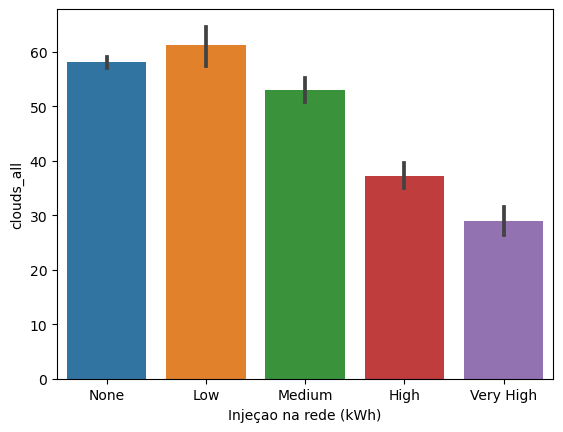

In [174]:
sns.barplot(x='Injeçao na rede (kWh)', y='clouds_all', data=treino)
plt.show()

### Relation: 'weather_description' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


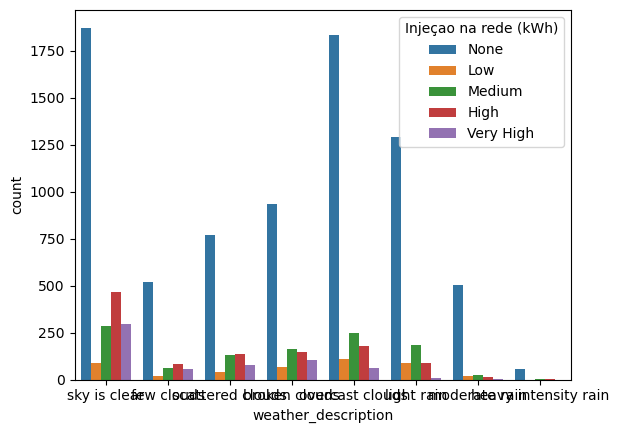

In [183]:
w_d_order = ['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds', 'overcast clouds', 'light rain', 'moderate rain', 'heavy intensity rain']

sns.countplot(x='weather_description', order= w_d_order, hue='Injeçao na rede (kWh)', data=treino)
plt.show()

## Fase 4: Tratamento de Dados pré modelação

We already noticed that the feature 'pressure' has little to no impact in the target feature 'Injeçao na rede (kWh)'. We can now remove that feature.

In [ ]:
treino = treino.drop(columns=['pressure'])
treino

,dt,Date,Hour,Month,Season,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injeçao na rede (kWh),temp,feels_like,temp_min,temp_max,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01,00:00:00,September,Autumn,NaN,NaN,NaN,NaN,18.74,18.84,15.72,20.34,NaN,NaN,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01,01:00:00,September,Autumn,NaN,NaN,NaN,NaN,18.73,18.83,15.72,20.34,NaN,NaN,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01,02:00:00,September,Autumn,NaN,NaN,NaN,NaN,17.84,17.98,16.72,20.34,NaN,NaN,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01,03:00:00,September,Autumn,NaN,NaN,NaN,NaN,18.27,18.40,16.68,20.34,NaN,NaN,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01,04:00:00,September,Autumn,NaN,NaN,NaN,NaN,17.81,17.97,16.12,20.34,NaN,NaN,89,0.93,1.26,95,moderate rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11683,1672513200,2022-12-31,19:00:00,December,Winter,1.693,0.000,0.0,None,15.70,15.57,15.57,15.72,NaN,NaN,86,5.56,3.58,100,moderate rain
11684,1672516800,2022-12-31,20:00:00,December,Winter,1.327,0.000,0.0,None,15.55,15.43,12.72,15.70,NaN,NaN,87,4.47,4.20,100,heavy intensity rain
11685,1672520400,2022-12-31,21:00:00,December,Winter,0.757,0.000,0.0,None,13.45,13.28,12.23,13.99,NaN,NaN,93,3.29,4.23,100,heavy intensity rain
11686,1672524000,2022-12-31,22:00:00,December,Winter,0.000,0.675,0.0,None,12.93,12.73,12.23,13.43,NaN,NaN,94,1.49,3.90,100,moderate rain


## Fase 5: Construção e avaliação de modelos ML